## Linear Regression Implementation

In this notebook, we will implement a single neuron linear regression model. Unlike the perceptron, this model will attempt to predict a continuous target. The model will find the best line of fit between a dependent and independent variable. 

Linear regression can be represented with the equation: 

$\qquad$ $\hat{y}_i = \beta_0 + \beta_1 \cdot x_{i, 1} + ... \beta_m \cdot x_{i, m}$

where $\hat{y}$ is each individual prediction. 

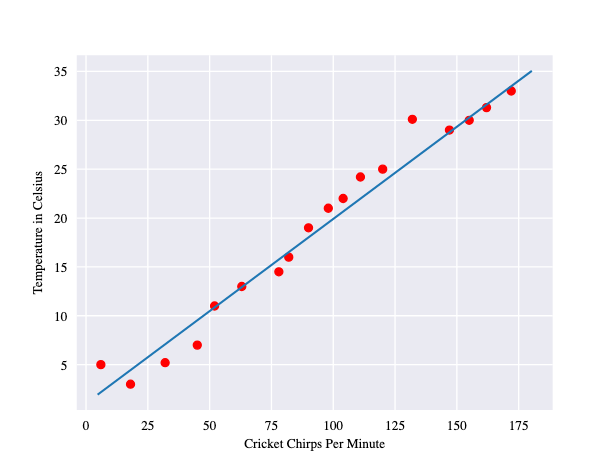

We will also utilize stochastic gradient descent to minimize the cost function of linear regression. 

The cost function of choice is the mean-squared error cost:
        
$\qquad$ $C(w,b) = \frac{1}{2N} \sum_{i=1}^{N} (\hat{y}^i - y^i)^2$
         

### Class Implementation

We can begin by implementing our regression model in a Python class. 

In [47]:
import numpy as np
import matplotlib.pyplot as plt
from mlxtend.plotting import plot_decision_regions

class SingleNeuron:
    """
    Represents a single artificial neuron.

    Attributes
    ----------
    activation_function : callable
    The function applied to the neuron's output (pre-activation).
    Example: sigmoid, tanh, relu, etc.

    cost_function : callable
    The loss function used to measure model performance during training.
    Example: mean squared error, cross entropy, etc.

    w_ : numpy.ndarray
    Weights vector for the neuron, with the last entry being the bias.

    errors_ : list of float
    Mean squared error for each epoch during training.

    Methods
    -------
    train(X, y, alpha=0.005, epochs=50) -> "SingleNeuron":
    Trains the neuron using stochastic gradient descent.

    predict(X: numpy.ndarray) -> numpy.ndarray:
    Predicts the output using the trained neuron.

    plot_cost_function():
    Plots the cost function across epochs.

    plot_decision_boundary(X, y, xstring="x", ystring="y"):
    Plots the decision boundary if the neuron is used for binary classification.
    """

    def __init__(self, activation_function: callable, cost_function: callable):
        self.activation_function = activation_function
        self.cost_function = cost_function
        self.w_ = None
        self.errors_ = []
        

    def train(self, X: np.ndarray, y: np.ndarray, alpha: float = 0.005, epochs: int = 50) -> "SingleNeuron":
        """
        Trains the neuron on the provided data.

        Parameters
        ----------
        X : numpy.ndarray
        The feature matrix with shape (number_samples, number_features).

        y : numpy.ndarray
        The target vector with shape (number_samples,).

        alpha : float, optional
        The learning rate. Default is 0.005.

        epochs : int, optional
        Number of times the entire dataset is shown to the model. Default is 50.

        Returns
        -------
        SingleNeuron
        The trained neuron.
        """
        self.w_ = np.random.randn(1 + X.shape[1])
        N = X.shape[0]

        for _ in range(epochs):
            errors = 0
            for xi, target in zip(X, y):
                update = alpha * (self.predict(xi) - target)
                self.w_[:-1] -= update * xi
                self.w_[-1] -= update
            errors += self.cost_function(self.predict(xi), target)
            self.errors_.append(errors / N)
        return self

    def predict(self, X: np.ndarray) -> np.ndarray:
        """
        Predicts the output for the given input data.

        Parameters
        ----------
        X : numpy.ndarray
        The feature matrix to predict on.

        Returns
        -------
        numpy.ndarray
        Predictions for the input samples.
        """
        z = np.dot(X, self.w_[:-1]) + self.w_[-1]
        return self.activation_function(z)

    def plot_cost_function(self):
        """Plots the cost across epochs."""
        fig, axs = plt.subplots(figsize=(10, 8))
        axs.plot(range(1, len(self.errors_) + 1), self.errors_, label="Cost function")
        axs.set_xlabel("Epochs", fontsize=15)
        axs.set_ylabel("Cost", fontsize=15)
        axs.legend(fontsize=15)
        axs.set_title("Cost Across Epochs During Training", fontsize=18)
        plt.show()

    def plot_decision_boundary(self, X, y, xstring="x", ystring="y"):
        """
        Plots the decision boundary for 2D data.

        Parameters
        ----------
        X : numpy.ndarray
        The feature matrix.

        y : numpy.ndarray
        The target vector.

        xstring : str, optional
        Label for the x-axis. Default is "x".

        ystring : str, optional
        Label for the y-axis. Default is "y".
        """

        plt.figure(figsize=(10, 6))
        plot_decision_regions(X, y, clf=self)
        plt.title("Neuron Decision Boundary", fontsize=18)
        plt.xlabel(xstring, fontsize=15)
        plt.ylabel(ystring, fontsize=15)
        plt.legend(loc='upper left')
        plt.show()

We also need to define our activation and cost functions. Since we are doing linear regression in this notebook, we will define a linear activation function. Also, as described above, our cost function will be the mean-squared-error. 

In [48]:
def linear_regression_activation(z):
    '''
    Linear Regression activation function
    
    Parameters:
    -----------
    z : float --> input to activation function
    
    Returns:
    --------
    float: same as input
    '''
    
    return z

def mean_squared_error(y_hat, y_actual):
    '''
    Mean Squared Error cost function
    
    Parameters:
    -----------
    y_hat : float
    y : float
    
    Returns:
    --------
    
    float: cost
    
    '''
    return .5*(y_hat - y_actual)**2

## Application on Auto-MPG Dataset

We can now apply our linear regression on our Auto-MPG efficiency dataset and analyze the results. We will try to fit a line between the target, MPG, and one feature, Horsepower.

Let's load our data and visualize the trend between the target and feature. 

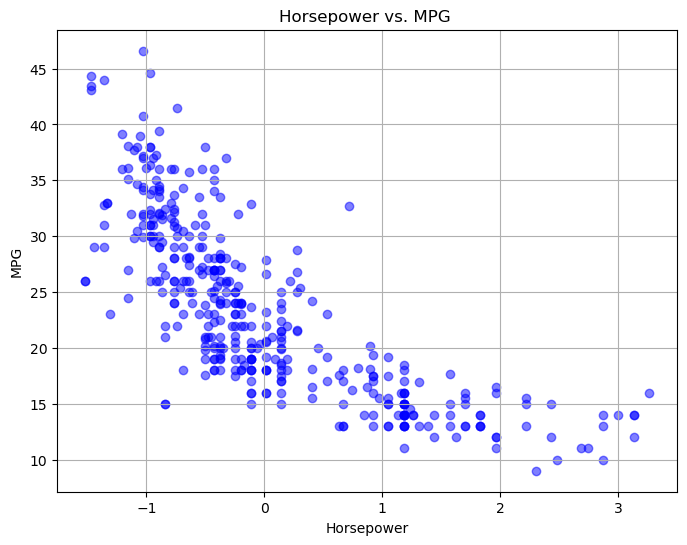

In [49]:
import pandas as pd
import matplotlib.pyplot as plt

auto = pd.read_csv("/Users/kritinshanmugam/Downloads/auto-mpg.csv")
auto = auto[auto['horsepower'] != '?']

X = auto.drop(['car name', 'mpg'], axis=1)
X = X.astype('float64')

X = (X - X.mean())/X.std()
X = X['horsepower'].astype('float64')
y = auto['mpg'].astype('float64')


plt.figure(figsize=(8, 6))
plt.scatter(X, y, color='blue', alpha=0.5)
plt.title('Horsepower vs. MPG ')
plt.xlabel('Horsepower')
plt.ylabel('MPG')
plt.grid(True)
plt.show()

As we can see, there is a clear downard trend between horsepower and mpg values. Our linear regression model should be able to fit this trend! Let's create an instance of our model and train it on our data. Then, we can plot our predictions.

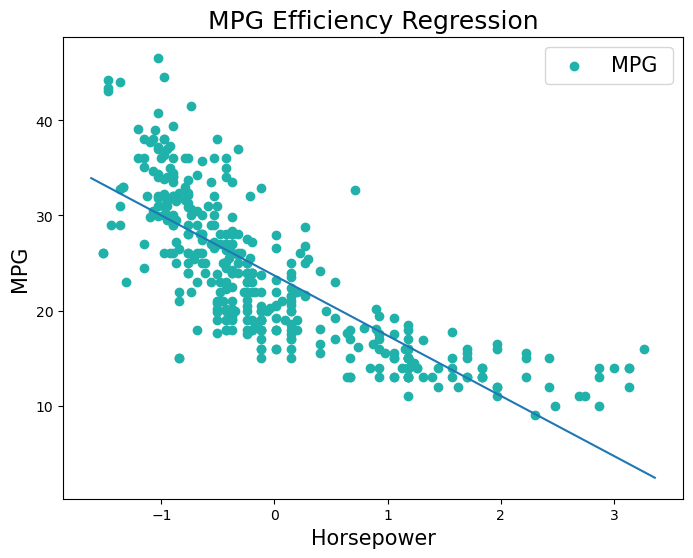

In [50]:
X = X.values.reshape(-1, 1)
y = y.values

neuron = SingleNeuron(linear_regression_activation, mean_squared_error)
neuron.train(X, y, alpha=0.001, epochs=20000)

domain = np.linspace(np.min(X) - .1, np.max(X) + .1, 100)

plt.figure(figsize = (8, 6))
plt.scatter(X, y, color = "lightseagreen", label = "MPG ")
plt.plot(domain, neuron.predict(domain.reshape(-1, 1)))
plt.xlabel("Horsepower", fontsize = 15)
plt.ylabel("MPG", fontsize = 15)
plt.title("MPG Efficiency Regression", fontsize = 18)
plt.legend(fontsize = 15)
plt.show()

Let's try to split up our data into training data and test data so we can calculate the total mean square error costs. 

In [52]:
import sklearn.metrics as ms
from sklearn.model_selection import train_test_split


X_train, X_test, y_train, y_test = train_test_split(X, y)
next_neuron = SingleNeuron(linear_regression_activation, mean_squared_error)
next_neuron.train(X_train, y_train, alpha=0.001, epochs=20000)

preds = next_neuron.predict(X_test)
print(ms.mean_squared_error(y_test, preds))

22.01173271063696


Our model achieved a MSE of about 22.01. We can potentially achieve a lower MSE by including more features in our model. However, for simplicity sake, we will keep our single variable model. In the future, we can add more features to our input data. 

## Conclusion

Nice! As seen in the visual, we were able to model the downward trend between horsepower and MPG with our linear regression model. This simple model was able to perform really well. Moving forward, we can explore more complex models and include more features!